https://21percentme.github.io/Milestone1

# Introduction and Discussion (video game trends to know when making new game)

Group Members: Jason Li and Alex Motyka

For our project, we have found two pretty cool datasets that we wanted to look into. The first dataset is the Video Game Sales dataset. The other dataset is just a larger video game dataset with more info.

## *Motivation*
In our two datasets, we really want to understand some of the general trends with video game sales. For example, we want to understand how video game sales varies with time and location, as well how different genres differ in sales and popularity. Other things we want to explore the relationship genre has with varibales like sale, rating, popularity, completion, stc.

We want to understand if there is a relationship between the the MetaCritic Reviews and User Reviews, and if there is a relationship between the number of acheivements in the game and the status of completion for that game for users. If there is a relationship, we also want to know if we could create a model to predict trends. We also want to see if this relationship is affected by the genre of the game.

In regards to the validity of our data, our first dataset is a webscrape from VGchartz, an industry research firm that publishes video game hardware estimates every week and hosts an ever-expanding game database with over 55,000 titles listed, featuring up-to-date shipment information and legacy sales data. for our Second dataset, it is data also from the RAWG API, where RAWG is the largest video game database and game discovery service.

## *Further Resources and Subjective evaluation*

For this analysis, this is probably most interesting for induviduals who want to make games, or see a glimpse into the history behind video games. For those who want to make a video game, this analysis helps understand what type of genre is popular and where they are popular, as well as how different types of games sell. A few relevant resources are mentioned below:

1. VGChartz.com - a website detailing video game stats and info, which one fo these datasets was scraped off of

2. RAWG.io - a video game databse API containing 500,000+ games over 50 platforms. This API wsa used to obtain the second dataset

3. history.com/topics/inventions/history-of-video-games - this website can help give further insight to why some trends in the data occurred the way it did.

4. github.com/leomaurodesenv/game-datasets - This repository contains may more video game and video game related data, offerring much more indepth information on different aspects of video games

# Collaboration Plan:

We plan on meeting weekly via zoom, with a Github Repository as our main collaboraiton method. We may also use Google Collab, as it has been what we are using in class, but we will really only move if the Github Repository does not work out well. We are utilizing GroupMe and Texts to communicate for this project, as well as setting up a ToDo list in order to efficiently assign tasks to each group member.

Each milestone starts with a meeting to dicuss what needs to be done, and we split up the work. Then when each person is finished with their part, we have the other person review it and make sure it is okay

In [2]:
#run if you are missing pandas:
#!pip install pandas
#%pip install seaborn
# !pip install scikit-learn as sklearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%cd /content
!git clone https://github.com/21percentme/21percentme.github.io.git
%cd /content/21percentme.github.io

/content
Cloning into '21percentme.github.io'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 66 (delta 31), reused 25 (delta 11), pack-reused 0
Receiving objects: 100% (66/66), 22.29 MiB | 5.49 MiB/s, done.
Resolving deltas: 100% (31/31), done.
Updating files: 100% (6/6), done.
/content/21percentme.github.io


## **Dataset 1: Video Game Sales (https://www.kaggle.com/datasets/gregorut/videogamesales)**

### Project Goals:

We chose this dataset because video games have gained popluarity along the years, especially with the recent mobility aspects of consoles. From here, it would be interesting to see how different video games have sold over the past years, which games are the most popular, and see how sale trends correspond with real life events

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com, uploaded by GregorySmith


Fields include:

    Rank - Ranking of overall sales
    Name - The games name
    Platform - Platform of the games release (i.e. PC,PS4, etc.)
    Year - Year of the game's release
    Genre - Genre of the game
    Publisher - Publisher of the game
    NA_Sales - Sales in North America (in millions)
    EU_Sales - Sales in Europe (in millions)
    JP_Sales - Sales in Japan (in millions)
    Other_Sales - Sales in the rest of the world (in millions)
    Global_Sales - Total worldwide sales.

In [4]:
#read the video game sales csv into a dataframe
game_sales = pd.read_csv("vgsales.csv")
#display first 5 rows to see what the data looks like
game_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Right now we should start with cleaning the dataset up a bit, so lets check how many null entries there are

In [5]:
#in here we sum up the number of null entries
game_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Looks like there are 271 null entries in year, so we do not know when 271 of the games were release. Additionally, 58 games have an unknown/unreported publisher. This may mess up our data analyzing, so lets just drop the entries with those null values. We are making sure to check that they were dropped.

In [6]:
# #in hhere we drop all null values
games = game_sales.dropna()
#and we check to see if it worked below
games.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Lets start looking into some basic analysis of the data! Lets first look at some basic summary stats of the data.

In [7]:
#so here we see some basic summary stats
games = game_sales
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


From here, we also look at what data types each variable is

In [8]:
#and call .info() to see the variable types
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Note that Platform, Genre, and Publisher are objects (strings). These variables are important to the questions we want to answer using this dataset, so we should consider turning these into individual binary columns based on the number of possible values.

In [9]:
games.groupby('Year')['Global_Sales'].sum()

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

In [10]:
games.groupby('Year').Global_Sales.sum().idxmax()

2008.0

In [11]:
games.groupby('Year').Global_Sales.sum().idxmin()

2017.0

In [12]:
games.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

It is cool to see the year video games sold the best is in 2008, and the worst in 2017, with the genre of action being the best selling.

Some questions we will investigate with this dataset:

1)Were genres popular in North America similar to those popular in the EU and Japan?

2) How did the popularity of video game genres change over time?

3)Why did those changes happen?

Because each row breaks each game's sales down by region, and also includes platform, genre, and year information, we will be able to answer the above questions with this dataset.

From here, we want to see the how video games sales differ with year and location

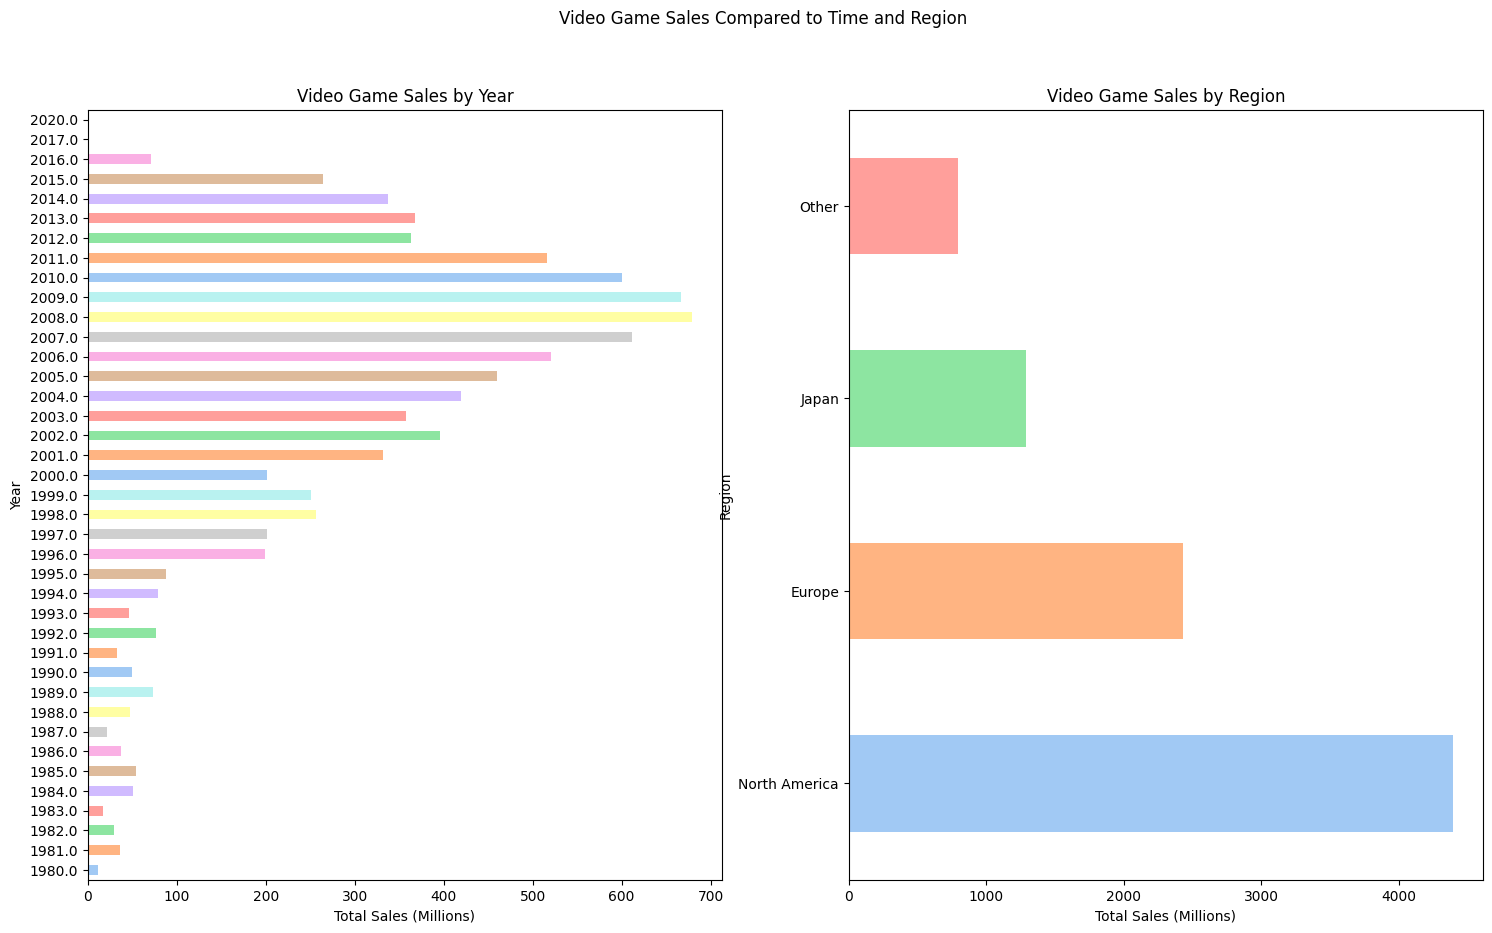

In [13]:
#rename columns for regions to be more intuitive
games = games.rename(columns={'Other_Sales': "Other", "JP_Sales": "Japan", "EU_Sales":"Europe", "NA_Sales":"North America"})
#group the global sales by year to see sales by year
years = games.groupby('Year')['Global_Sales'].sum()
#drop every column except for region, so we get sales per region
location = games.drop(columns=["Rank", "Year", "Global_Sales", "Platform", "Name", "Genre", "Publisher"]).sum()

#create sbplots to plot two plots at the same time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,10))
fig.suptitle('Video Game Sales Compared to Time and Region')

years.plot(kind = 'barh', color = sns.color_palette("pastel"), title = "Video Game Sales by Year", ax = ax1)
ax1.set_xlabel("Total Sales (Millions)")
ax1.set_ylabel("Year")
location.plot(kind = 'barh', color = sns.color_palette("pastel"), title = "Video Game Sales by Region", ax = ax2)
ax2.set_xlabel("Total Sales (Millions)")
ax2.set_ylabel("Region")

g = games
# fig.savefig('name.png')
# files.download('name.png')


This is very interesting. It seems like 2008 had the most sales worldwide for video games, whereas 2017 had very little sales. Comapred to other regions, it seems North America has a lot more sales over the last 20 or so years compared to other regions. This sort of makes sense though, as North America is the largeset region.

The following histogram shows the distribution of games over time. It is easy to see how the number of video games on the market skyrocketed starting around 1996, why does that occur?

looking at the grpah above more closely, it looks like there was a sudden spike in 1996 to video game sales, I wonder why? Lets look into the consoles that had the most sales in 1996.

<ipython-input-14-e30a65e35277>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  n96 = n96.groupby("Publisher").sum()


Text(0, 0.5, 'Publisher')

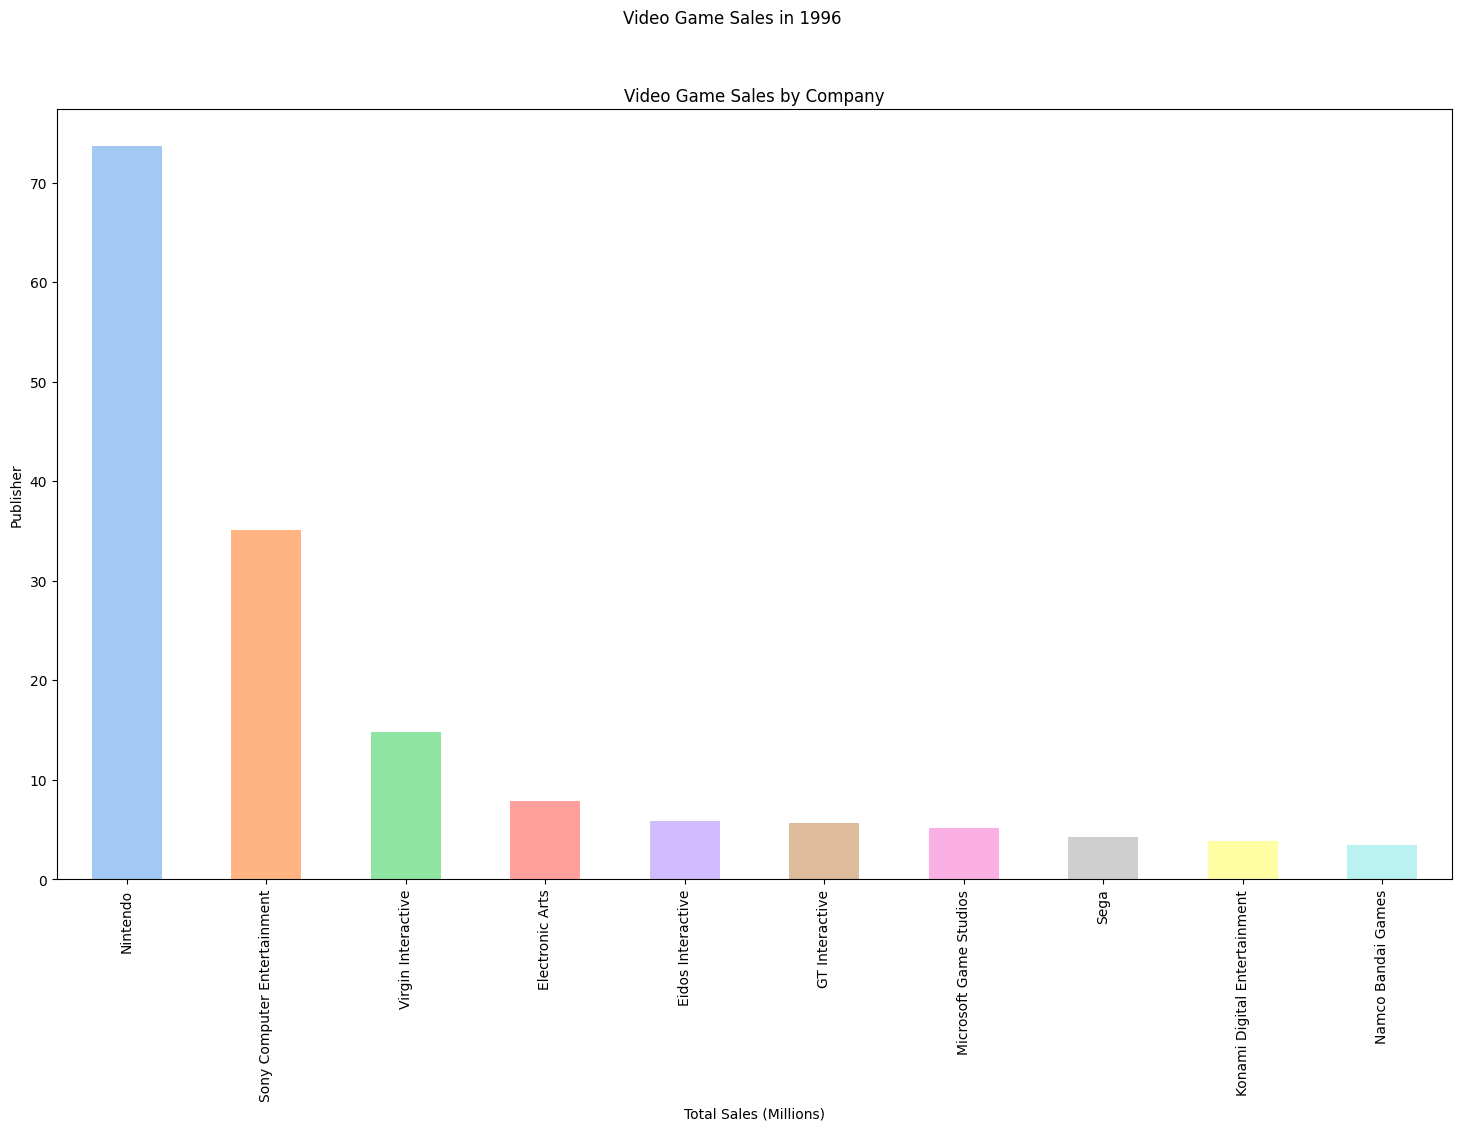

In [14]:
n96 = games[games.Year == 1996]
n96 = n96.groupby("Publisher").sum()
n96 = n96.Global_Sales.sort_values()

fig, (ax1) = plt.subplots(1, 1, figsize = (18,10))
fig.suptitle('Video Game Sales in 1996')
n96 = n96.sort_values(ascending=False)
n96= n96[:10]
n96.plot(kind = 'bar', color = sns.color_palette("pastel"), title = "Video Game Sales by Company", ax = ax1)
ax1.set_xlabel("Total Sales (Millions)")
ax1.set_ylabel("Publisher")


It looks like there Nintendo blows all the other companies out of the water! Granted, Nintendo is one of the biggest game companies, but to out preform even Sony this much, something must have happend. After a quick google search, it looks like **1996 was the year the Nintendo n64 released,as well as pokemon red and blue releasing**, which means Nintendo with the new 3D console and popular games, it should be the most popular publisher this year.

In [15]:
%%capture

#we know nintendo was most popular, so now we see what nintendo games sold the best
platform = games.loc[games.Publisher == "Nintendo"]
platform.drop(columns=["Rank", 'Other', 'Europe', "North America", "Japan"], inplace=True)
platform = platform[platform.Year == 1996]
platform = platform.groupby("Platform")

In [16]:
platform.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
46,Super Mario 64,N64,1996.0,Platform,Nintendo,11.89
63,Mario Kart 64,N64,1996.0,Racing,Nintendo,9.87
372,Donkey Kong Country 3: Dixie Kong's Double Tro...,SNES,1996.0,Platform,Nintendo,3.51
484,Wave Race 64,N64,1996.0,Racing,Nintendo,2.94
574,Star Wars: Shadows of the Empire,N64,1996.0,Action,Nintendo,2.65
672,Donkey Kong Land II,GB,1996.0,Platform,Nintendo,2.35
762,Super Mario RPG: Legend of the Seven Stars,SNES,1996.0,Role-Playing,Nintendo,2.14
1020,Cruis'n USA,N64,1996.0,Racing,Nintendo,1.74
1336,Kirby Super Star,SNES,1996.0,Platform,Nintendo,1.44


Our findings online are confirmed! Pokemon was had the most sales by far, and many of the top sales are N64 Games.

From here, we were wondering if there were any differences in genre popularity in different regions.

Text(0.5, 0, 'Genres')

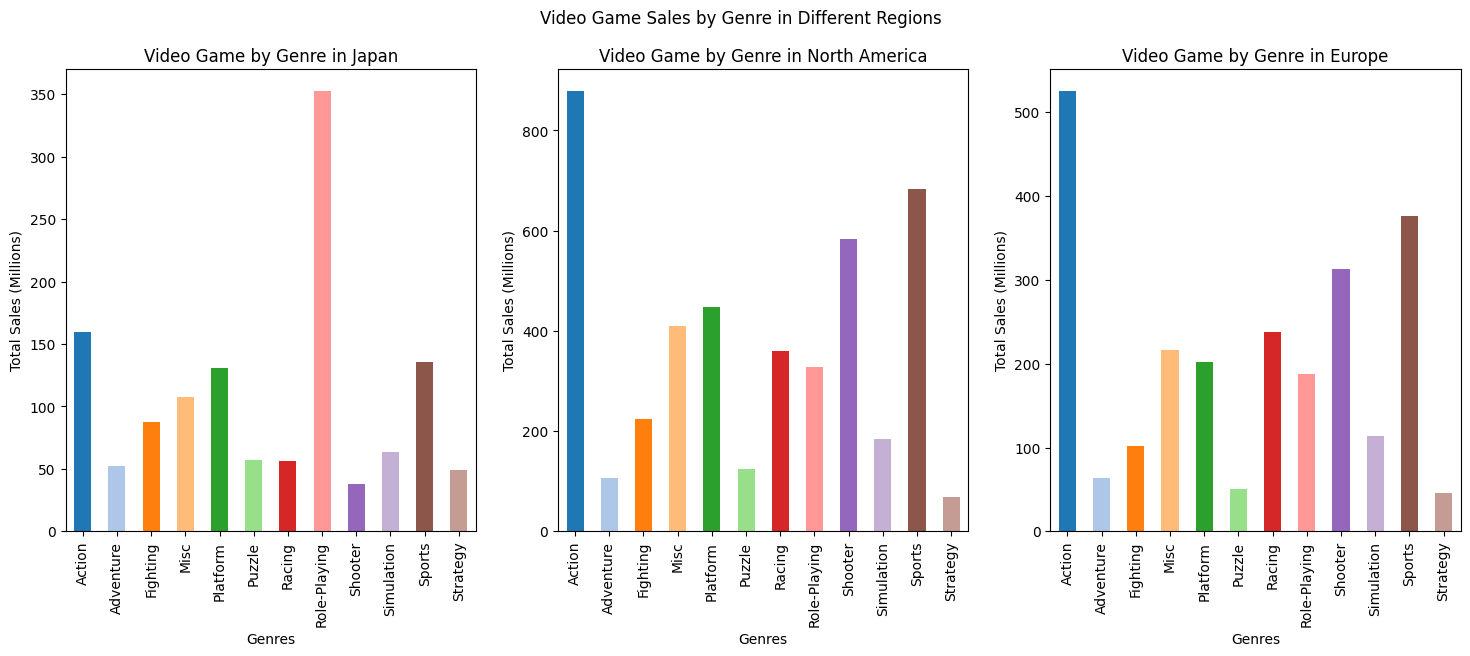

In [17]:
#group by region

#drop every column except for regions and genre, so we can see genre sales per
grouping = games.drop(columns=["Rank", "Year", "Global_Sales", "Platform", "Name", "Publisher"])
genres = grouping.groupby("Genre").sum()

#Genre for Japan  = JA, Genre for North America is genre for NA, and so forth
JA = genres["Japan"]
NA = genres["North America"]
EU = genres["Europe"]

#create sbplots to plot three plots at the same time
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,6))
fig.suptitle('Video Game Sales by Genre in Different Regions')

JA.plot(kind = 'bar', color = sns.color_palette("tab20"), title = "Video Game by Genre in Japan", ax = ax1)
ax1.set_ylabel("Total Sales (Millions)")
ax1.set_xlabel("Genres")

NA.plot(kind = 'bar', color = sns.color_palette("tab20"), title = "Video Game by Genre in North America", ax = ax2)
ax2.set_ylabel("Total Sales (Millions)")
ax2.set_xlabel("Genres")

EU.plot(kind = 'bar', color = sns.color_palette("tab20"), title = "Video Game by Genre in Europe", ax = ax3)
ax3.set_ylabel("Total Sales (Millions)")
ax3.set_xlabel("Genres")


It is cool to see that in both Europe and North America, Action is the msot popular genre, with sports close behind. However, in Japan, Role-Playing is the most popular by far. I guess different regions have diffrerent likes!

## **Dataset 2: Video Game Dataset (https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset?rvi=1)**

This dataset contains 474417 video games on over 50 platforms including mobiles. All game information was obtained using Python with RAWG API. This dataset was last updated on Dec 22nd 2020, made by Trung Hoang

Fields include:

    id: An unique ID identifying this Game in RAWG Database
    slug: An unique slug identifying this Game in RAWG Database
    name: Name of the game
    metacritic: Rating of the game on Metacritic
    released: The date the game was released
    tba: To be announced state
    updated: The date the game was last updated
    website: Game Website
    rating: Rating rated by RAWG user
    rating_top: Maximum rating
    playtime: Hours needed to complete the game
    achievements_count: Number of achievements in game
    ratings_count: Number of RAWG users who rated the game
    suggestions_count: Number of RAWG users who suggested the game
    game_series_count: Number of games in the series
    reviews_count: Number of RAWG users who reviewed the game
    platforms: Platforms game was released on. Separated by ||
    developers: Game developers. Separated by ||
    genres: Game genres. Separated by ||
    publishers: Game publishers. Separated by ||
    esrb_rating: ESRB ratings
    added_status_yet: Number of RAWG users had the game as "Not played"
    added_status_owned: Number of RAWG users had the game as "Owned"
    added_status_beaten: Number of RAWG users had the game as "Completed"
    added_status_toplay: Number of RAWG users had the game as "To play"
    added_status_dropped: Number of RAWG users had the game as "Played but not beaten"
    added_status_playing: Number of RAWG users had the game as "Playing"

This dataset was interesting to us because it is another dataset on video games. We want to use this to get more info

In [18]:
gameinfo = pd.read_csv("game_info.csv")
gameinfo.head()

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+,4,88,2,2,0,0
1,10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0,...,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone,2,42,2,0,0,0
2,100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,...,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+,0,2,2,0,1,0
3,1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,...,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen,0,1,0,0,0,0
4,10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,1,...,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,2,79,0,0,0,0


Lets again see where the null values are

In [19]:
gameinfo.isnull().sum()

id                           0
slug                         2
name                         2
metacritic              469684
released                 24199
tba                          0
updated                      0
website                 409376
rating                       0
rating_top                   0
playtime                     0
achievements_count           0
ratings_count                0
suggestions_count            0
game_series_count            0
reviews_count                0
platforms                 3986
developers                8366
genres                  103185
publishers              333384
esrb_rating             418553
added_status_yet             0
added_status_owned           0
added_status_beaten          0
added_status_toplay          0
added_status_dropped         0
added_status_playing         0
dtype: int64

In [20]:
gameinfo = gameinfo.drop(['slug', 'tba', 'updated', 'website', 'rating_top', 'developers', 'publishers', 'esrb_rating', 'reviews_count', 'suggestions_count', 'game_series_count'], axis=1)

gameinfo.head()

,id,name,metacritic,released,rating,playtime,achievements_count,ratings_count,platforms,genres,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,1,D/Generation HD,NaN,2015-10-23,0.0,1,80,2,PC||macOS||Xbox One||PlayStation 4||Nintendo S...,Adventure||Puzzle,4,88,2,2,0,0
1,10,G Prime Into The Rain,NaN,2016-01-06,0.0,0,26,3,macOS||PC||Xbox One,Simulation||Indie,2,42,2,0,0,0
2,100,Land Sliders,NaN,2015-09-24,0.0,0,0,2,iOS,Adventure||Arcade,0,2,2,0,1,0
3,1000,Pixel Gear,NaN,2016-10-20,0.0,0,0,0,PC||PlayStation 4,Action||Indie,0,1,0,0,0,0
4,10000,Gods and Idols,NaN,2016-12-12,0.0,1,0,5,PC,RPG||Strategy||Massively Multiplayer,2,79,0,0,0,0


In [21]:
gameinfo.describe()

,id,metacritic,rating,playtime,achievements_count,ratings_count,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
count,474417.000000,4733.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000,474417.000000
mean,266884.000325,73.159307,0.085723,0.221662,4.448837,2.142463,0.685030,11.251418,1.361486,0.430767,0.678100,0.149027
std,154567.811630,11.502213,0.545049,5.399684,117.671466,36.553606,9.012424,128.531595,28.519725,8.970948,10.484977,3.911149
min,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133664.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,267945.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,406010.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,525551.000000,99.000000,5.000000,1600.000000,12322.000000,4289.000000,635.000000,8298.000000,3533.000000,2325.000000,1092.000000,644.000000


In [22]:
gameinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    474417 non-null  int64  
 1   name                  474415 non-null  object 
 2   metacritic            4733 non-null    float64
 3   released              450218 non-null  object 
 4   rating                474417 non-null  float64
 5   playtime              474417 non-null  int64  
 6   achievements_count    474417 non-null  int64  
 7   ratings_count         474417 non-null  int64  
 8   platforms             470431 non-null  object 
 9   genres                371232 non-null  object 
 10  added_status_yet      474417 non-null  int64  
 11  added_status_owned    474417 non-null  int64  
 12  added_status_beaten   474417 non-null  int64  
 13  added_status_toplay   474417 non-null  int64  
 14  added_status_dropped  474417 non-null  int64  
 15  

Now we want to look into if there is any relationship between the sales in genre compared to the user ratings in genre. This means we first need to merge the two datasets.

In [23]:
gameinfo_N = gameinfo.rename(columns={'name': "Name"})
gameinfo_N.head()
merged = games.merge(gameinfo_N, on=["Name"], how='inner')
merged.count()

Rank                    9771
Name                    9771
Platform                9771
Year                    9585
Genre                   9771
Publisher               9754
North America           9771
Europe                  9771
Japan                   9771
Other                   9771
Global_Sales            9771
id                      9771
metacritic              2299
released                9417
rating                  9771
playtime                9771
achievements_count      9771
ratings_count           9771
platforms               9762
genres                  7956
added_status_yet        9771
added_status_owned      9771
added_status_beaten     9771
added_status_toplay     9771
added_status_dropped    9771
added_status_playing    9771
dtype: int64

It looks like we have almost 10,000 datapoints preserved after merging, which is more than enough to analyze! Now we first do a check to see if trends are preserved in sales by genre, basically doing the same graph as we did earlier.

Text(0.5, 0, 'Genres')

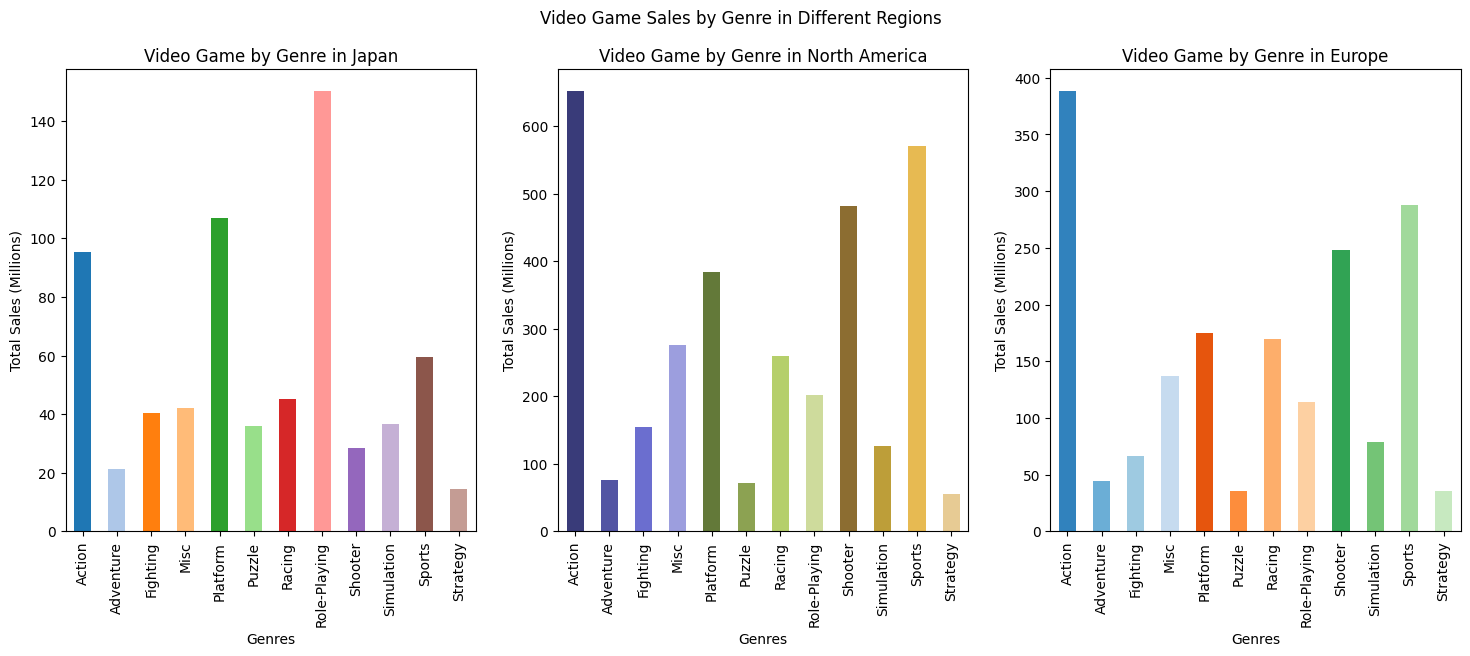

In [24]:
grouping = merged[["Genre", "Japan", "North America", "Europe"]]
genres = grouping.groupby("Genre").sum()

#Genre for Japan  = JA, Genre for North America is genre for NA, and so forth
JA = genres["Japan"]
NA = genres["North America"]
EU = genres["Europe"]

#create sbplots to plot three plots at the same time
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,6))
fig.suptitle('Video Game Sales by Genre in Different Regions in the merged dataset')

JA.plot(kind = 'bar', color = sns.color_palette("tab20"), title = "Video Game by Genre in Japan", ax = ax1)
ax1.set_ylabel("Total Sales (Millions)")
ax1.set_xlabel("Genres")

NA.plot(kind = 'bar', color = sns.color_palette("tab20b"), title = "Video Game by Genre in North America", ax = ax2)
ax2.set_ylabel("Total Sales (Millions)")
ax2.set_xlabel("Genres")

EU.plot(kind = 'bar', color = sns.color_palette("tab20c"), title = "Video Game by Genre in Europe", ax = ax3)
ax3.set_ylabel("Total Sales (Millions)")
ax3.set_xlabel("Genres")

It looks pretty much the same, so that is a good sign. Now lets see average rating per genre comared to sales per genre.

In [25]:
genre = merged[["Genre", "rating", "Global_Sales"]]
genre_rate= genre.groupby("Genre").mean()
genre_sale = genre.groupby("Genre").sum()
gsale = genre_sale.Global_Sales
grate = genre_rate.rating

Text(0, 0.5, 'Min-Max Scale')

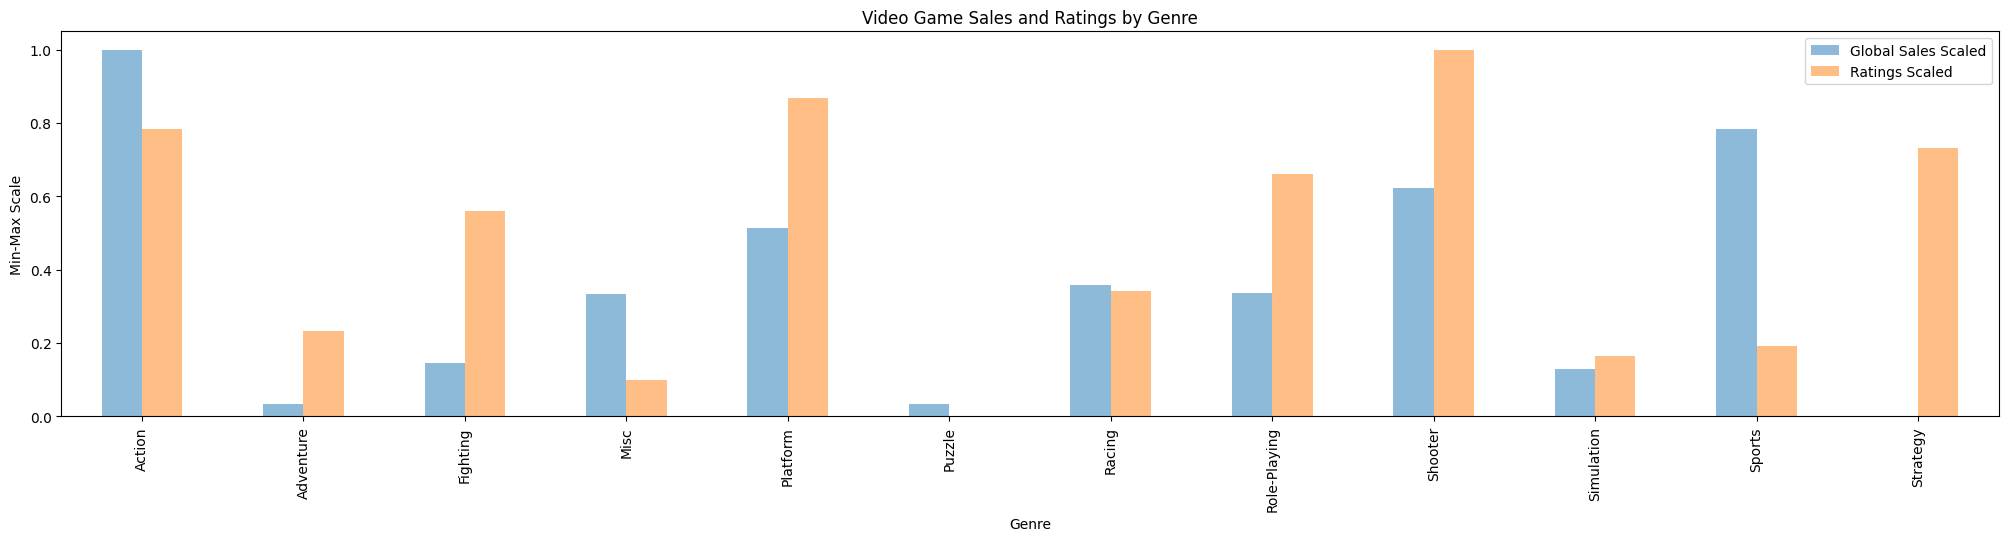

In [26]:
from sklearn.preprocessing import MinMaxScaler
#because ratings are in units of 1-5, and sale is in millions, we must scale. We use MinMax scaler just so there are no negatives
scaler = MinMaxScaler()

#set index of df into the genres
index = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
#minmax scale data
grate_sc = scaler.fit_transform(grate.to_frame())
gsale_sc = scaler.fit_transform(gsale.to_frame())

#create new df
total = pd.DataFrame()
total['index'] = index
total['Global Sales Scaled'] = gsale_sc
total['Ratings Scaled'] = grate_sc

#now graph df
total_graph = total.set_index('index')

fig, (ax1) = plt.subplots(1, 1, figsize = (25,5))
total_graph.plot(kind = 'bar', title = "Video Game Sales and Ratings by Genre", ax = ax1, alpha = .5)
ax1.set_xlabel("Genre")
ax1.set_ylabel("Min-Max Scale")

It looks like there isn't really a relationship between global sales and ratings when looking at different genres. For puzzle, it seems to be lowest of both ratings and global sales, and for simulation and racing, both genres seem to have about the same amount of global sales an level of rating propotionally. However, generally, the trends seem to not match up between the two.

From here, we decided to look into if there was a relationship between the status of completion and genre.

In [27]:
genre = merged[["Genre", "rating", "Global_Sales"]]
genre_rate= genre.groupby("Genre").mean()
genre_sale = genre.groupby("Genre").sum()
gsale = genre_sale.Global_Sales
grate = genre_rate.rating


In [28]:
gameinfo['released'] = pd.to_datetime(gameinfo['released'], errors='coerce')

metacritic_info = gameinfo.dropna()

metacritic_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4671 entries, 43 to 474387
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4671 non-null   int64         
 1   name                  4671 non-null   object        
 2   metacritic            4671 non-null   float64       
 3   released              4671 non-null   datetime64[ns]
 4   rating                4671 non-null   float64       
 5   playtime              4671 non-null   int64         
 6   achievements_count    4671 non-null   int64         
 7   ratings_count         4671 non-null   int64         
 8   platforms             4671 non-null   object        
 9   genres                4671 non-null   object        
 10  added_status_yet      4671 non-null   int64         
 11  added_status_owned    4671 non-null   int64         
 12  added_status_beaten   4671 non-null   int64         
 13  added_status_to

,Not Played,Beaten,To Play,Stopped Playing not Beaten,Currently Playing
Genre,,,,,
Action,68136,279862,36220,85934,14514
Adventure,10343,38114,5979,7872,1864
Fighting,1652,10152,1021,5552,637
Misc,1313,10701,837,5699,2587
Platform,10098,37966,5532,16189,2287
Puzzle,1009,2902,505,1930,319
Racing,6696,17984,2302,15378,1108
Role-Playing,24284,87546,15731,31069,8616
Shooter,39439,196936,17551,51755,7745


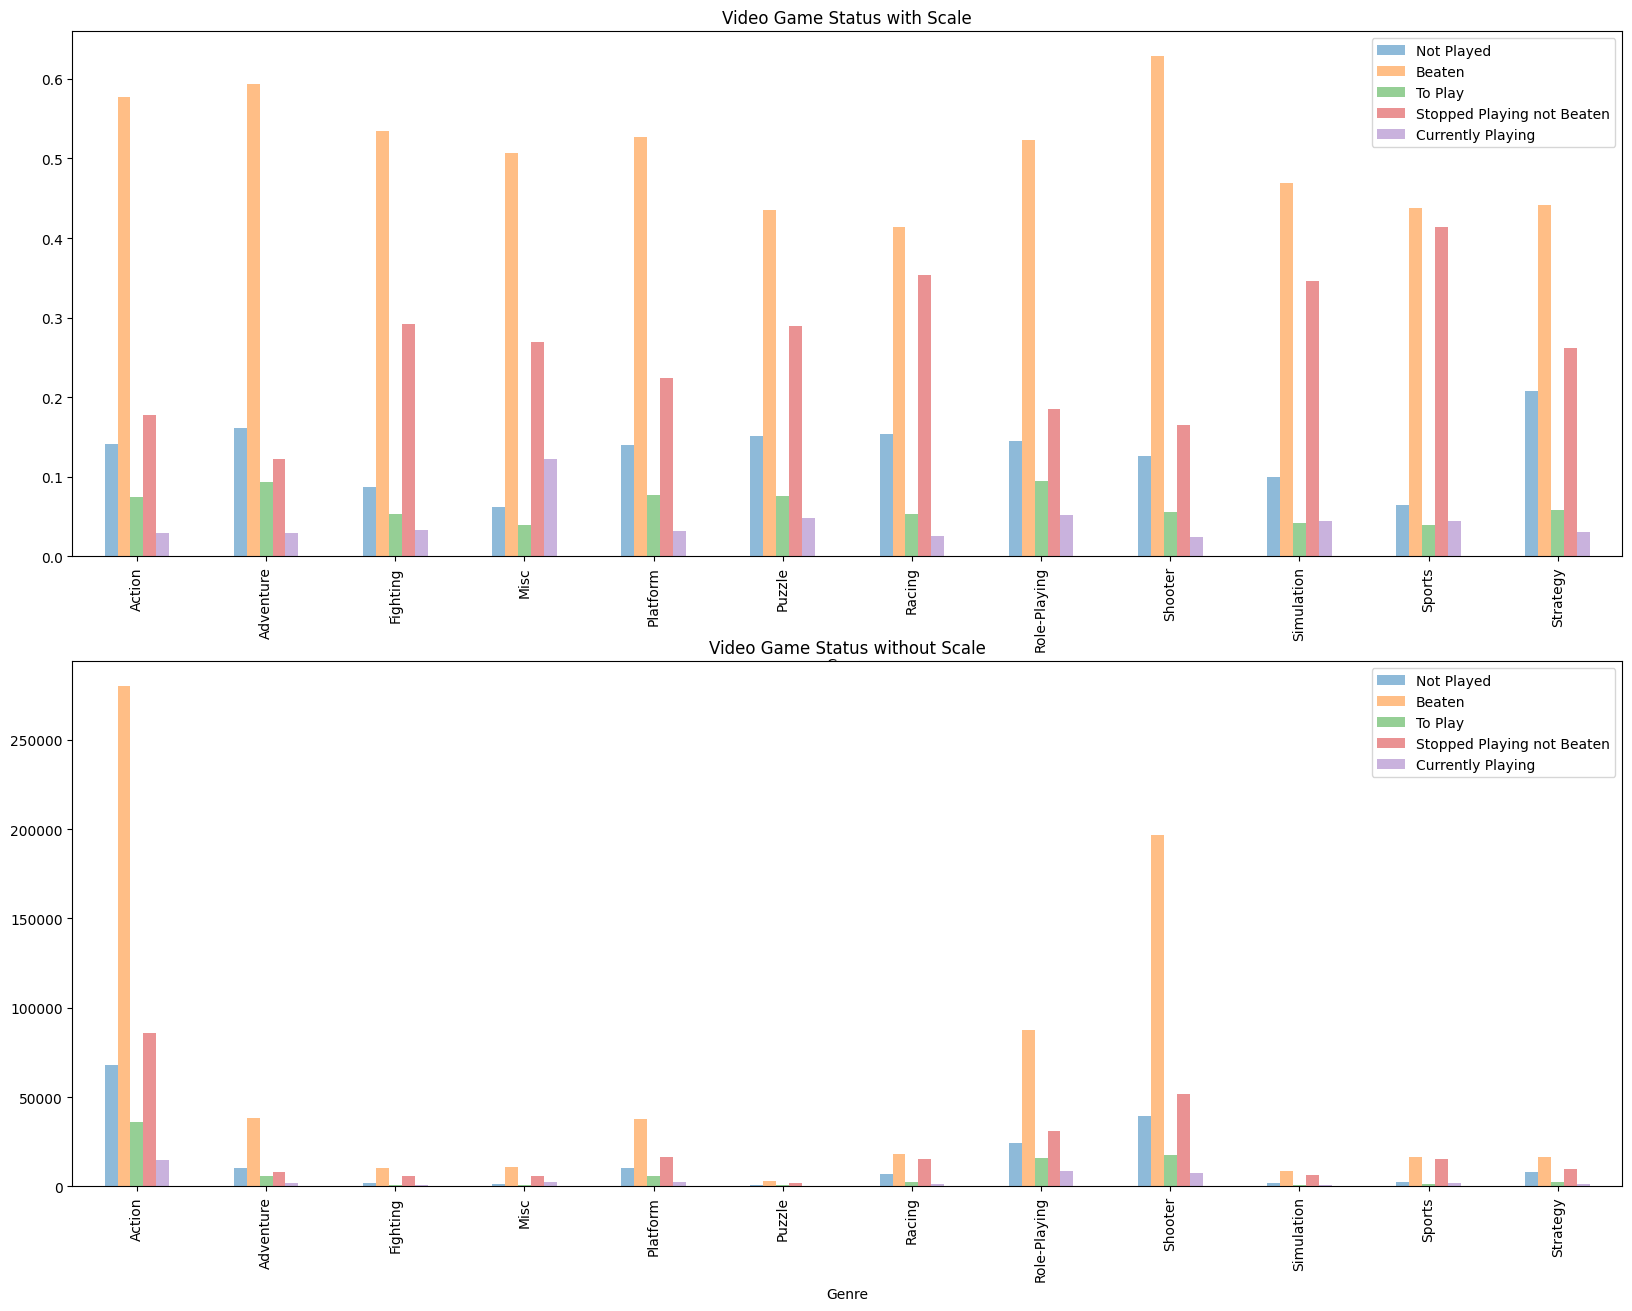

In [29]:
#now we create a graph showin status of completion per genre
top = merged[['Genre','added_status_yet', 'added_status_beaten', 'added_status_toplay', 'added_status_dropped', 'added_status_playing']]
top = top.rename(columns = {'added_status_yet': 'Not Played',
                       'added_status_beaten': 'Beaten',
                       'added_status_toplay': 'To Play',
                       'added_status_dropped': 'Stopped Playing not Beaten',
                       'added_status_playing': 'Currently Playing'
               })
total = top.groupby('Genre').sum().sum(axis='columns')
single = top.groupby('Genre').sum()
thPlt = top.groupby('Genre').sum()


for i in range(12):
  thPlt.iloc[i] = single.iloc[i]/total.iloc[i]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20,15))
single.plot(kind = 'bar', title = "Video Game Status without Scale",  ax = ax2, alpha = .5)
thPlt.plot(kind = 'bar', title = "Video Game Status with Scale",  ax = ax1,alpha = .5)


We thought that for example if genre predicts status, maybe if a genre is prone to not be beaten, then maybe the genre is not the best type to pursue, or don't make the game very long. However, it seems there is no general trend, but sports genre seems to be the one with the highest ratio of played but not beaten to total amount of statusus. This makes sense as a lot of sports games you play again and again, where you can play online, with friends, etc.

## **Model 1** (Do we delete)??

We wanted to develop a model that could predict the user reviews given the metacritic review, but before we look into that, we should look to see if there is a relationship between the two attributes.

<ipython-input-30-a0750d5c96d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metacritic_info['release_year'] = metacritic_info['released'].dt.year


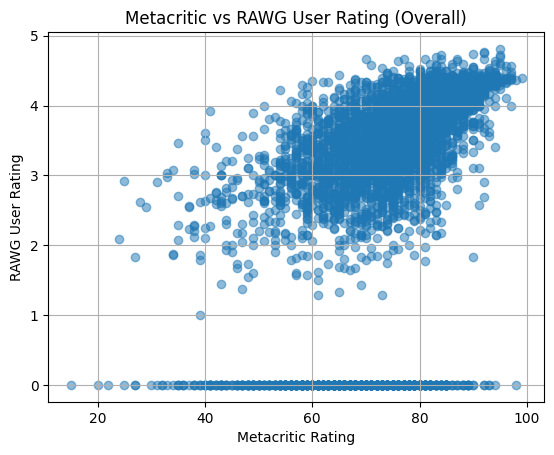

In [30]:
import matplotlib.pyplot as plt

metacritic_info['release_year'] = metacritic_info['released'].dt.year

def plot_metacritic_vs_rating(data, title):
    plt.scatter(data['metacritic'], data['rating'], alpha=0.5)
    plt.title(title)
    plt.xlabel('Metacritic Rating')
    plt.ylabel('RAWG User Rating')
    plt.grid(True)
    plt.show()

plot_metacritic_vs_rating(metacritic_info, 'Metacritic vs RAWG User Rating (Overall)')


There appears to be a positive correllation between metacritic and user reviews. However, it is clear that we need to consider games that were not rated by users, as this will affect any model we play try to implement.

<ipython-input-31-27e805aa5b49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metacritic_info['completion_percentage'] = (metacritic_info['added_status_beaten'] / metacritic_info['ratings_count']) * 100


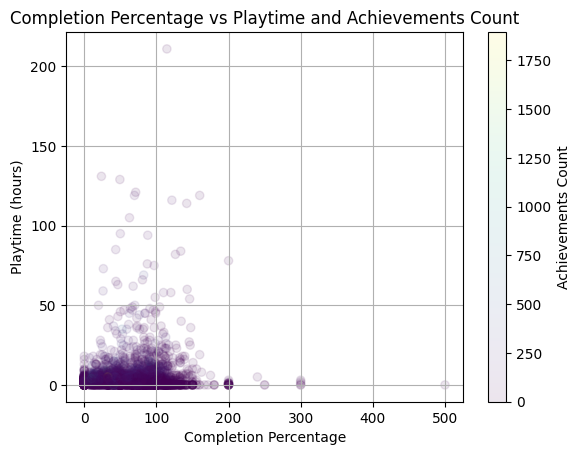

In [31]:
metacritic_info['completion_percentage'] = (metacritic_info['added_status_beaten'] / metacritic_info['ratings_count']) * 100

plt.scatter(metacritic_info['completion_percentage'], metacritic_info['playtime'], c=metacritic_info['achievements_count'], cmap='viridis', alpha=0.1)
plt.colorbar(label='Achievements Count')
plt.title('Completion Percentage vs Playtime and Achievements Count')
plt.xlabel('Completion Percentage')
plt.ylabel('Playtime (hours)')
plt.grid(True)
plt.show()

There doesn't appear to be any sort of meaningful relationship here. Let's try something else instead.

In [32]:
metacritic_info['genres']

43                         Action||Adventure||Indie
85                                 Action||Strategy
207                        Action||Adventure||Indie
249                                      RPG||Indie
291             Action||Strategy||Simulation||Indie
                            ...                    
474208    Adventure||RPG||Simulation||Casual||Indie
474216                             Action||Strategy
474237              Strategy||Massively Multiplayer
474292                         Strategy||Simulation
474387        Action||Shooter||Strategy||Simulation
Name: genres, Length: 4671, dtype: object

In [33]:
genres_dummies = metacritic_info['genres'].str.get_dummies()

metacritic_info = pd.concat([metacritic_info, genres_dummies], axis=1)

metacritic_info = metacritic_info.drop('genres', axis=1)

In [34]:
metacritic_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4671 entries, 43 to 474387
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     4671 non-null   int64         
 1   name                   4671 non-null   object        
 2   metacritic             4671 non-null   float64       
 3   released               4671 non-null   datetime64[ns]
 4   rating                 4671 non-null   float64       
 5   playtime               4671 non-null   int64         
 6   achievements_count     4671 non-null   int64         
 7   ratings_count          4671 non-null   int64         
 8   platforms              4671 non-null   object        
 9   added_status_yet       4671 non-null   int64         
 10  added_status_owned     4671 non-null   int64         
 11  added_status_beaten    4671 non-null   int64         
 12  added_status_toplay    4671 non-null   int64         
 13  

In [35]:
metacritic_info['metacritic'] /= 20

<ipython-input-36-5de1fca1974a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

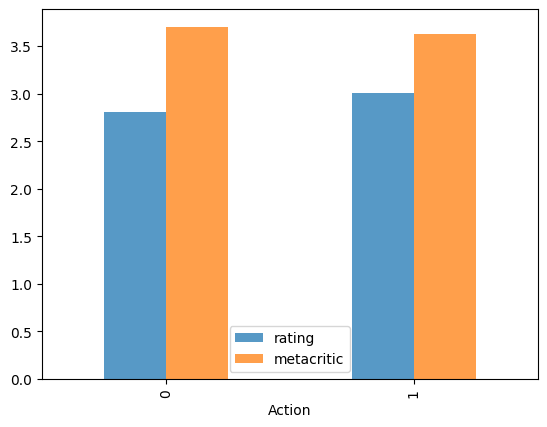

<Figure size 1200x600 with 0 Axes>

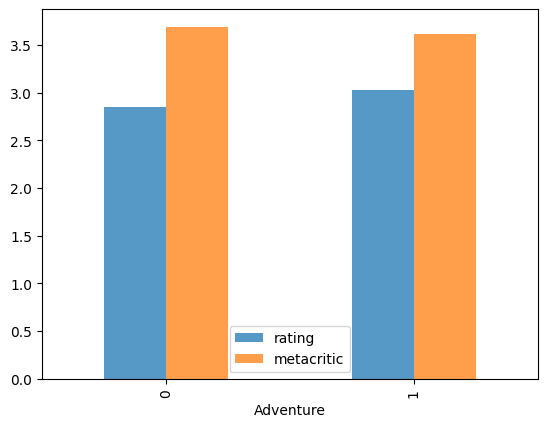

<Figure size 1200x600 with 0 Axes>

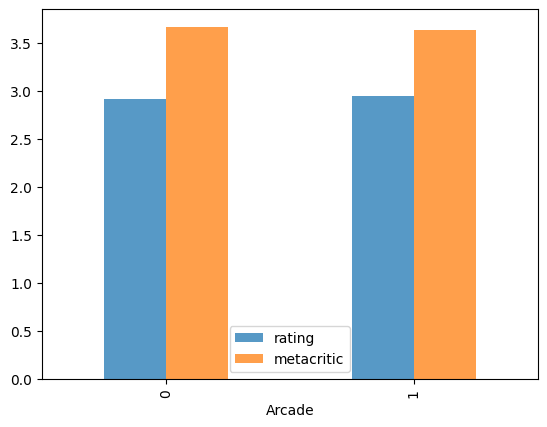

<Figure size 1200x600 with 0 Axes>

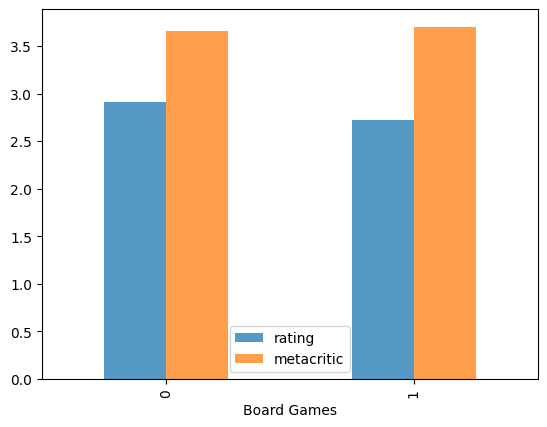

<Figure size 1200x600 with 0 Axes>

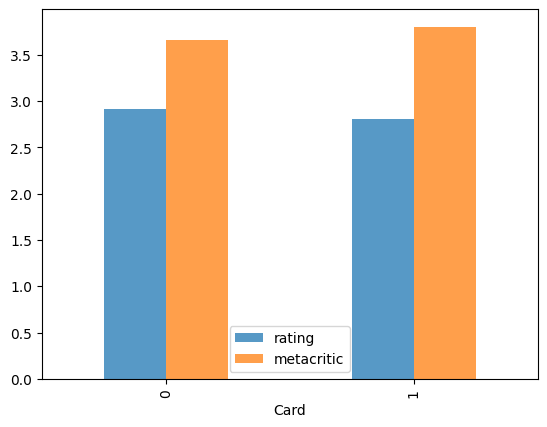

<Figure size 1200x600 with 0 Axes>

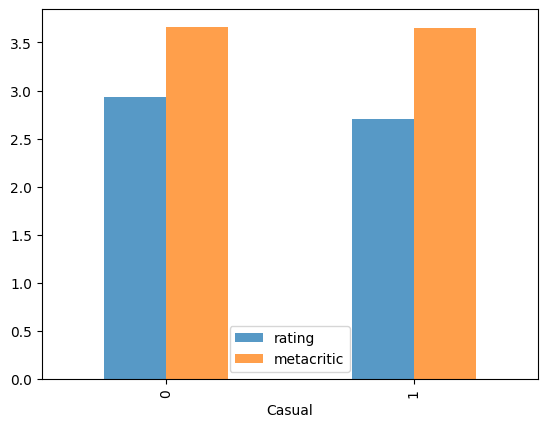

<Figure size 1200x600 with 0 Axes>

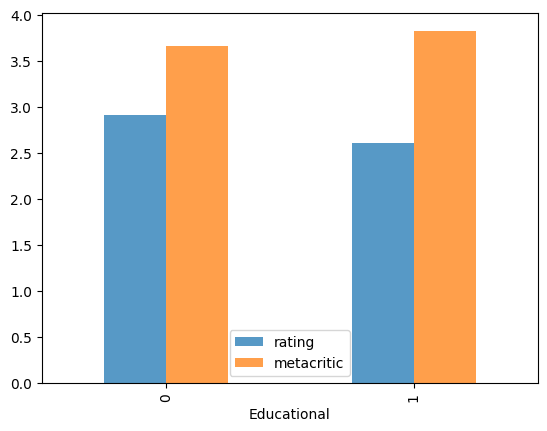

<Figure size 1200x600 with 0 Axes>

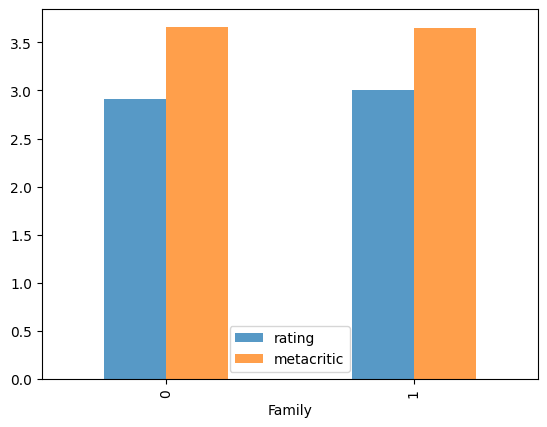

<Figure size 1200x600 with 0 Axes>

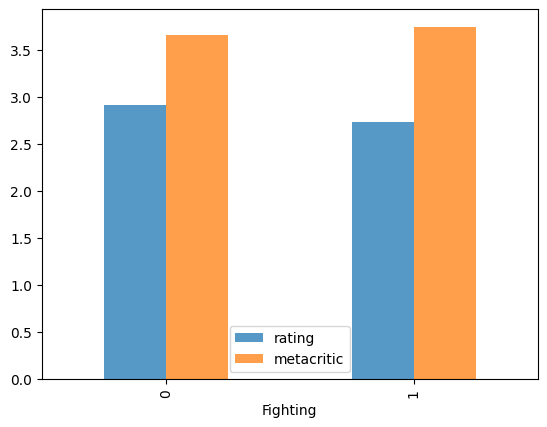

<Figure size 1200x600 with 0 Axes>

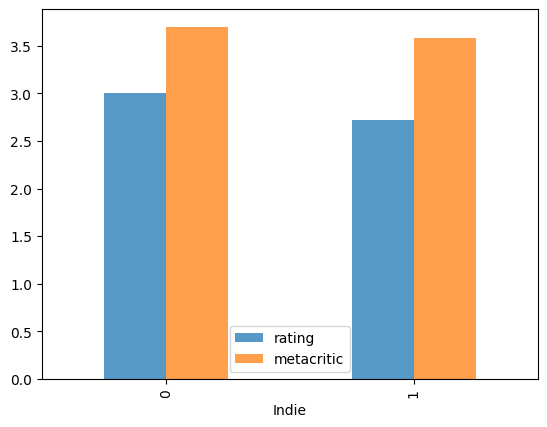

<Figure size 1200x600 with 0 Axes>

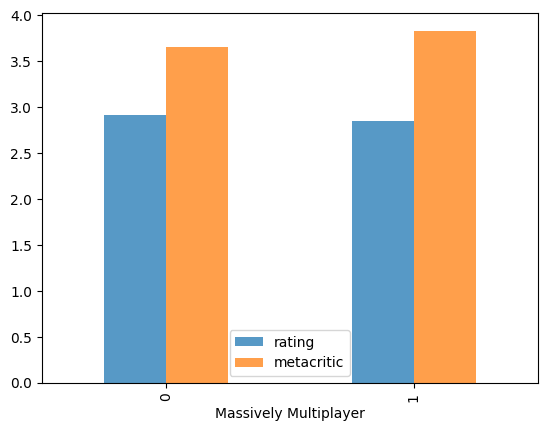

<Figure size 1200x600 with 0 Axes>

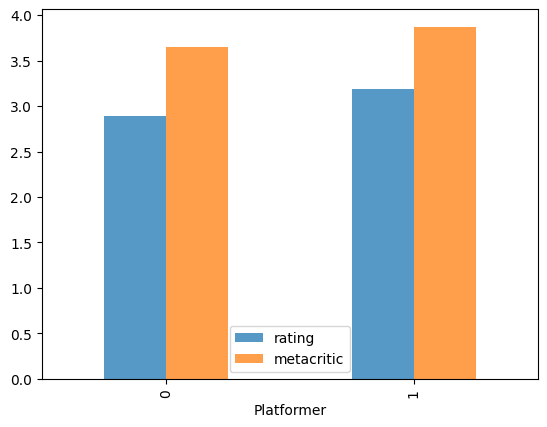

<Figure size 1200x600 with 0 Axes>

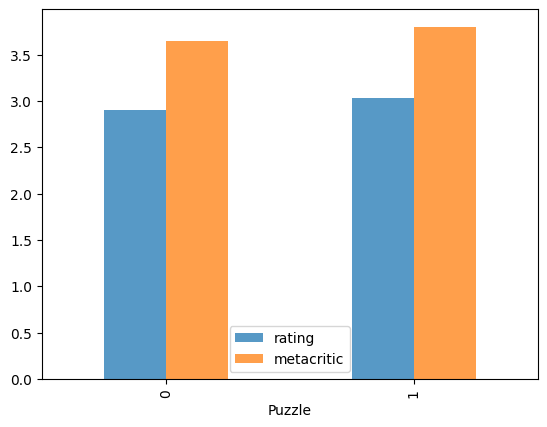

<Figure size 1200x600 with 0 Axes>

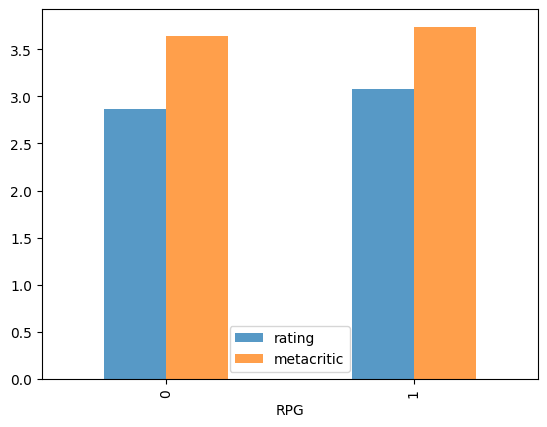

<Figure size 1200x600 with 0 Axes>

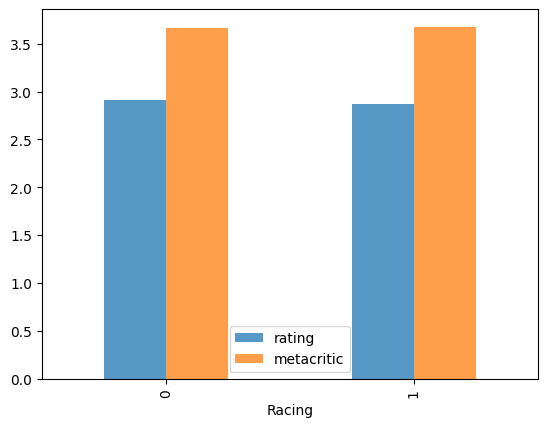

<Figure size 1200x600 with 0 Axes>

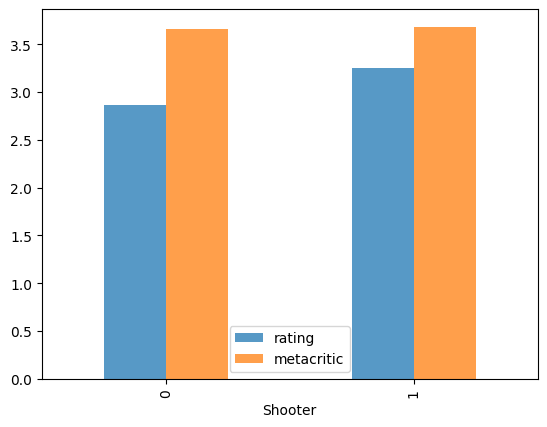

<Figure size 1200x600 with 0 Axes>

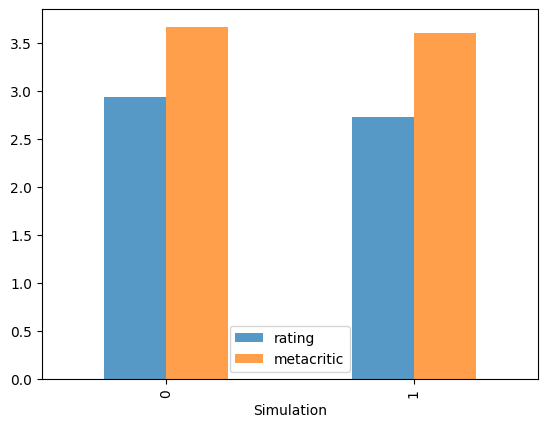

<Figure size 1200x600 with 0 Axes>

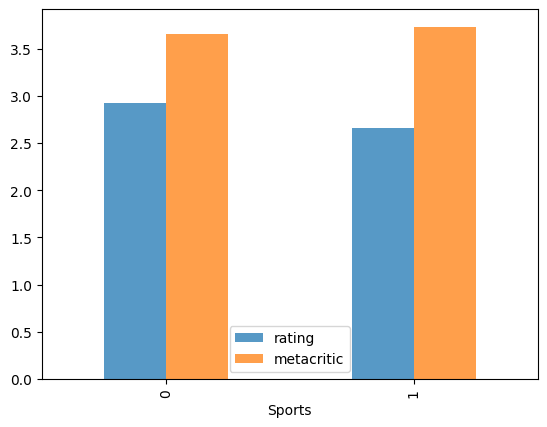

<Figure size 1200x600 with 0 Axes>

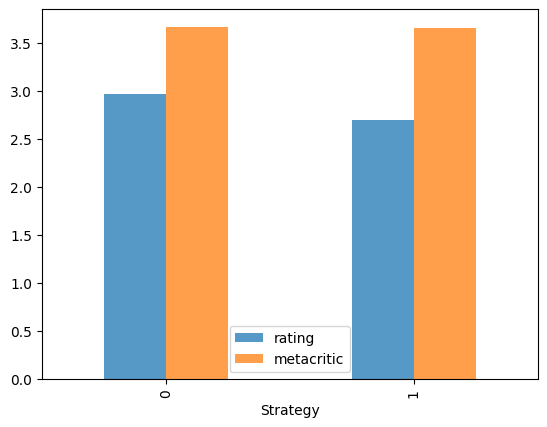

In [36]:
for genre in genres_dummies:
    genre_ratings = metacritic_info.groupby(genre)[['rating', 'metacritic']].mean()
    plt.figure(figsize=(12, 6))
    genre_ratings.plot(kind='bar', alpha=0.75)
#plt.title('Average User Rating and Metacritic Rating by Genre')
#plt.xlabel('Genre')
#plt.ylabel('Average Rating')
#plt.legend(['User Rating', 'Metacritic Rating'])
#plt.xticks(rotation=45, ha='right')
#plt.show()


Not much information we can get from this. There doesn't seem to be a lot of variety in the difference between average user and critic reviews for specific genres.

It appears that the most promising potential relationship is between user and metacritic ratings at a macro level. Some additional independant variables we can include in a predictive model are number of reviews and reccomendations (which may be good proxies for the relative popularity of a game) in addition to the total number of downloads. We can also look further into the impact of genres, achievements, and playtime length on ratings.

## **Model 2** (Not Working)

One of the models we talked about at the start would be a model to understand if there is a relationship for Genrre and the number of acheivements(NOA) in the game and the status of completeion(SOC) for that game for users. If there is a relationship, we also want to know if we could create a model to predict trends.

In this model, we would like to use Genre to predic NOA and SOC, which seems like a pretty complex task. We currently have a plan to enact this however:
1. Split dataset 2 by Genre, if needed drop columns other than NOA and SOC
    
    Given that some of the games may have many genres, we are dropping games with more than 3 genres, as that leads to attributes due to genre being less accurate

Genre tends to influence many properties of the game, for example sports games and roleplaying games will have different gameplay loops, where a releplaying game could have a larger storyline, leading to a larger game. It could also mean that because sports games have a lot of replayablility, there could be more achievements linked to that. As the result, we are very interested to see the relations.

2. Use KNN model find some interests:
    1. Given Genre and NOA, what would be the predicted SOC?
    2. Given SOC and NOA, what Genre of game would it most likely be?

    This model can also be expanded to include other attributes of the dataset, adding more depth and posilbilties to predictions of other attributes


In this model, there is no one dependent and independent variable, as you can use one attribute to predict the other, and vice versa, so it depends on you question. But in our two interests, the variables would be as follows:
1. Independent: Genre and NOA | Dependent: SOC
2. Independent: SOC and NOA | Dependent: Genre
    

In [37]:
#vertical bar is a wird charcaer, must us \| to use as delimiter
merged.count()

Rank                    9771
Name                    9771
Platform                9771
Year                    9585
Genre                   9771
Publisher               9754
North America           9771
Europe                  9771
Japan                   9771
Other                   9771
Global_Sales            9771
id                      9771
metacritic              2299
released                9417
rating                  9771
playtime                9771
achievements_count      9771
ratings_count           9771
platforms               9762
genres                  7956
added_status_yet        9771
added_status_owned      9771
added_status_beaten     9771
added_status_toplay     9771
added_status_dropped    9771
added_status_playing    9771
dtype: int64

In [38]:
#creating new instance of DF
genreSplit = merged[['Genre','achievements_count', 'playtime', 'Global_Sales','rating', 'metacritic']]
genreSplit.playtime.value_counts()


0      6710
1       658
2       421
3       291
4       258
       ... 
65        1
129       1
75        1
63        1
139       1
Name: playtime, Length: 85, dtype: int64

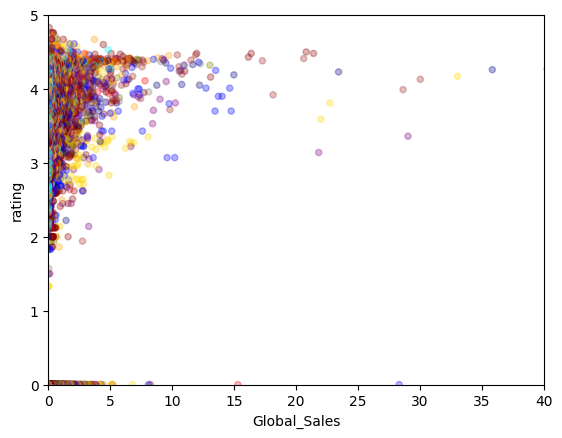

In [39]:
colors = genreSplit["Genre"].map({
    "Action": "darkred",
    "Sports": "gold",
    'Shooter': 'blue',
    'Role-Playing': 'orange',
    'Misc': 'purple',
    'Platform': 'brown',
    'Adventure': 'pink',
    'Simulation': 'gray',
    'Fighting': 'olive',
    'Strategy': 'cyan',
    'Racing': 'navy',
    'Puzzle': 'red',
})

scatter = genreSplit.plot.scatter(
    x="Global_Sales", y="rating", c=colors,
    alpha=.3, xlim=(0, 40), ylim=(0, 5))



In [40]:
#['Genre','achievements_count', 'playtime', 'Global_Sales','rating', 'metacritic']
X_train = genreSplit[['playtime']]
y_train = genreSplit["Genre"]

#Alex this is new model: not quite working

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

scores = []
f1 = []

for k in range(1,50):
  #train and fit the model
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_sc, y_train)
    y_train_pred = model.predict(X_train_sc)
    #add accuracy score to a list
    scores.append(accuracy_score(y_train_pred, y_train))

    #f1 score is essentially binary, so we must do S or not S, add to list
    f1.append(f1_score(y_train, y_train_pred, average = 'weighted', labels = "Action"))

In [42]:
max = pd.Series(scores).max()
id = pd.Series(scores).idxmax()
print("Max Accuracy is " + str(max) + " at k = " + str(id+1))

Max Accuracy is 0.20069593695629925 at k = 39


In [43]:
x = np.arange(1,50)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

Text(0, 0.5, 'Accuracy')

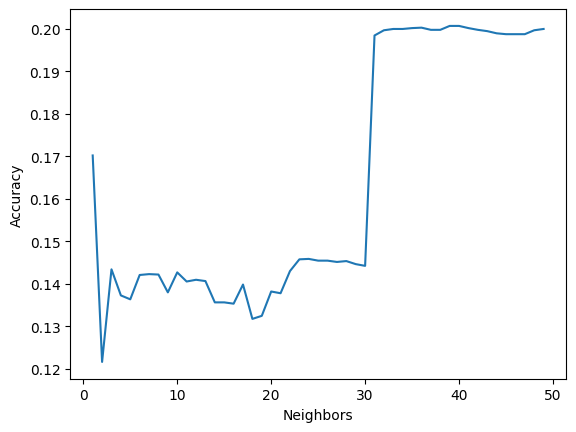

In [44]:
plt.plot(x,scores)
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")


In [45]:
# #creating new instance of DF
# genreSplit = gameinfo[['genres','achievements_count','added_status_yet', 'added_status_beaten', 'added_status_toplay', 'added_status_dropped', 'added_status_playing']]
# genreSplit = genreSplit.rename(columns = {'added_status_yet': 'Not Played',
#                        'added_status_beaten': 'Beaten',
#                        'added_status_toplay': 'To Play',
#                        'added_status_dropped': 'Stopped Playing not Beaten',
#                        'added_status_playing': 'Currently Playing'
#                })
# #replace the current genre column with one defined above to be able to count # of genres
# genreSplit['genres'] = genrecolumn
# #create a count column, counting how many genres
# genreSplit['county'] = genreSplit.genres.str.len()
# #drop entries with more than 3 genres
# genreSplit = genreSplit[genreSplit.county < 4]
# #split entries by genre, so we can train based on single genre
# genreSplit = genreSplit.explode('genres')
# genreSplit.drop(columns = ["county"], inplace = True)
# genreSplit

NameError: ignored

Now we have a datafram with the vidoe game data by genre, and we can start training the model

Since there was little correlation on the how sale, number of achivment, and review relate to the genre, we decided to predict how well the a genre would sell in each region given the genre, platform, and publisher.

In [46]:
sales = g.drop(columns = ["Name"])
sales = sales.dropna()
sales

,Rank,Platform,Year,Genre,Publisher,North America,Europe,Japan,Other,Global_Sales
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,16596,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# Features in our model.
# features = ["North America", "Japan", "Europe", "Other"]
# X_train_dict = sales[features].to_dict(orient="records")
# y_train = sales['Global_Sales']

# convert categorical variables to dummy variables
# vec = DictVectorizer(sparse=False)
# vec.fit(X_train_dict)
# X_train = vec.transform(X_train_dict)

# standardize the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_sc = scaler.transform(X_train)

# fit the 5-nearest neighbors model
# vec = DictVectorizer(sparse=False)
# model = KNeighborsRegressor(n_neighbors=10)
# pipeline = Pipeline([("vectorizer", vec), ("fit", model)])

30    1.491520
37    1.491539
28    1.491572
36    1.491578
38    1.491612
35    1.491634
32    1.491653
34    1.491659
33    1.491685
29    1.491702
31    1.491725
39    1.491794
27    1.491826
25    1.491832
41    1.491854
42    1.491884
26    1.491885
40    1.491892
44    1.491976
43    1.492042
45    1.492159
24    1.492227
23    1.492230
46    1.492438
22    1.492501
47    1.492540
48    1.492630
49    1.492817
50    1.493101
21    1.493191
20    1.493487
19    1.494122
18    1.494399
17    1.495088
16    1.495534
15    1.496219
14    1.496784
12    1.497327
13    1.497357
11    1.498758
10    1.499273
9     1.500143
8     1.501539
7     1.503230
6     1.504675
5     1.506786
4     1.509098
3     1.516570
2     1.523306
1     1.544749
dtype: float64

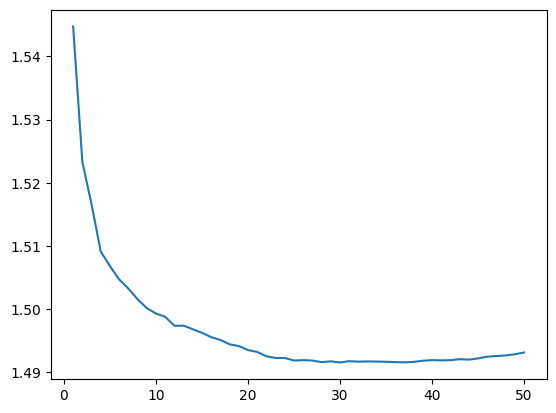

In [48]:
features = ["North America", "Genre", "Platform","Publisher"]
X_train_dict = sales[features].to_dict(orient="records")
y_train = sales['Global_Sales']

def get_cv_error(k):
    vec = DictVectorizer(sparse=False)
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([("vectorizer", vec), ("fit", model)])
    mse = np.sqrt(np.mean(-cross_val_score(
        pipeline, X_train_dict, y_train,
        cv=10, scoring="neg_mean_squared_error"
    )))
    return mse


ks = pd.Series(range(1, 51))
ks.index = range(1, 51)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()

In [49]:
vec = DictVectorizer(sparse=False)
model = KNeighborsRegressor(n_neighbors=30)
pipeline = Pipeline([("vectorizer", vec), ("fit", model)])
mae = (np.mean(-cross_val_score(
        pipeline, X_train_dict, y_train,
        cv=10, scoring="neg_mean_absolute_error"
)))
mae

0.41327550640801125

It looks like with a neightbor of 30, we get the lowest RSME Error, hence why we are choosing KNN n=28 for our best model. From here, as we learnt in class, MAE and RMSE measure how off a "typical" prediction is. There are other metrics that can be used to measure the quality of a regression model, but these are the most common ones. For our RMSE for n=28, after using cross validation with a cv of 10, we got an RMSE of 1.48. Putting this into the conetext of the mean...